In [2]:
#import what needs to be imported for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# read in csv
SSA_data_dirt = pd.read_csv('SSA-SA-FYWL.csv')

SSA_data=SSA_data_dirt.drop('State Code'=='PR')

In [4]:
#Give adding details that will be important for plotting later on.

# get 50 different colors
N = len(np.unique(SSA_data['State Code']))
StateColors = {
    'Colors': np.random.random(N),
    'State Code': np.unique(SSA_data['State Code'])
}
StateColorMap = pd.DataFrame(StateColors)
# merge
SSA_data = pd.merge(SSA_data, StateColorMap, on = 'State Code', how = "left")

# convert date to numeric
SSA_data['Date_numeric'] = pd.to_numeric(SSA_data['Date'])


In [5]:
#Grouping frames by Regions

#regional dataframes
atl=SSA_data.loc[SSA_data['Region Code']=='ATL']
bos=SSA_data.loc[SSA_data['Region Code']=='BOS']
chi=SSA_data.loc[SSA_data['Region Code']=='CHI']
dal=SSA_data.loc[SSA_data['Region Code']=='DAL']
den=SSA_data.loc[SSA_data['Region Code']=='DEN']
kcm=SSA_data.loc[SSA_data['Region Code']=='KCM']
nyc=SSA_data.loc[SSA_data['Region Code']=='NYC']
phl=SSA_data.loc[SSA_data['Region Code']=='PHL']
sea=SSA_data.loc[SSA_data['Region Code']=='SEA']
sfo=SSA_data.loc[SSA_data['Region Code']=='SFO']

#list of regions
regions=[atl,bos,chi,dal,den,kcm,nyc,phl,sea,sfo]

In [6]:
#ATL states as individual dataframes
AL=SSA_data.loc[SSA_data['State Code']=='AL ']
FL=SSA_data.loc[SSA_data['State Code']=='FL ']
GA=SSA_data.loc[SSA_data['State Code']=='GA ']
KY=SSA_data.loc[SSA_data['State Code']=='KY ']
MS=SSA_data.loc[SSA_data['State Code']=='MS ']
NC=SSA_data.loc[SSA_data['State Code']=='NC ']
SC=SSA_data.loc[SSA_data['State Code']=='SC ']
TN=SSA_data.loc[SSA_data['State Code']=='TN ']



In [7]:
#BOS as individual dataframes

MA=SSA_data.loc[SSA_data['State Code']=='MA ']
ME=SSA_data.loc[SSA_data['State Code']=='ME ']
NH=SSA_data.loc[SSA_data['State Code']=='NH ']
VT=SSA_data.loc[SSA_data['State Code']=='VT ']
RI=SSA_data.loc[SSA_data['State Code']=='RI ']
CT=SSA_data.loc[SSA_data['State Code']=='CT ']


In [8]:
#CHI states as individual dataframes
IL=SSA_data.loc[SSA_data['State Code']=='IL ']
IN=SSA_data.loc[SSA_data['State Code']=='IN ']
MI=SSA_data.loc[SSA_data['State Code']=='MI ']
MN=SSA_data.loc[SSA_data['State Code']=='MN ']
OH=SSA_data.loc[SSA_data['State Code']=='OH ']
WI=SSA_data.loc[SSA_data['State Code']=='WI ']


In [9]:
#DAL states as individual dataframes
AR=SSA_data.loc[SSA_data['State Code']=='AR ']
LA=SSA_data.loc[SSA_data['State Code']=='LA ']
NM=SSA_data.loc[SSA_data['State Code']=='NM ']
OK=SSA_data.loc[SSA_data['State Code']=='OK ']
TX=SSA_data.loc[SSA_data['State Code']=='TX ']


In [10]:
#DEN states as individual dataframes
CO=SSA_data.loc[SSA_data['State Code']=='CO ']
MT=SSA_data.loc[SSA_data['State Code']=='MT ']
ND=SSA_data.loc[SSA_data['State Code']=='ND ']
SD=SSA_data.loc[SSA_data['State Code']=='SD ']
UT=SSA_data.loc[SSA_data['State Code']=='UT ']
WY=SSA_data.loc[SSA_data['State Code']=='WY ']


In [11]:
#KCM states as individual dataframes
IA=SSA_data.loc[SSA_data['State Code']=='IA ']
KS=SSA_data.loc[SSA_data['State Code']=='KS ']
MO=SSA_data.loc[SSA_data['State Code']=='MO ']
NE=SSA_data.loc[SSA_data['State Code']=='NE ']


In [12]:
#NYC states as individual dataframes
NJ=SSA_data.loc[SSA_data['State Code']=='NJ ']
NY=SSA_data.loc[SSA_data['State Code']=='NY ']


In [13]:
#PHL states as individual dataframes
DC=SSA_data.loc[SSA_data['State Code']=='DC ']
DE=SSA_data.loc[SSA_data['State Code']=='DE ']
MD=SSA_data.loc[SSA_data['State Code']=='MD ']
PA=SSA_data.loc[SSA_data['State Code']=='PA ']
VA=SSA_data.loc[SSA_data['State Code']=='VA ']
WV=SSA_data.loc[SSA_data['State Code']=='WV ']


In [14]:
#SEA states as individual dataframes
AK=SSA_data.loc[SSA_data['State Code']=='AK ']
ID=SSA_data.loc[SSA_data['State Code']=='ID ']
OR=SSA_data.loc[SSA_data['State Code']=='OR ']
WA=SSA_data.loc[SSA_data['State Code']=='WA ']


In [15]:
#SFO states as individual dataframes.  Guam excluded since it is not in the data set.
AZ=SSA_data.loc[SSA_data['State Code']=='AZ ']
CA=SSA_data.loc[SSA_data['State Code']=='CA ']
HI=SSA_data.loc[SSA_data['State Code']=='HI ']
NV=SSA_data.loc[SSA_data['State Code']=='NV ']


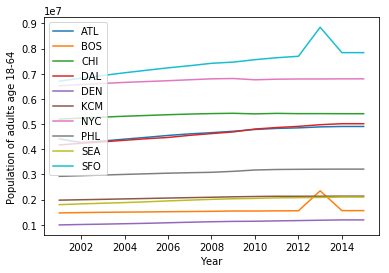

In [16]:
#groupby to plot population trends by region
SSA_agg = SSA_data.groupby(['Region Code','Date_numeric'])['Population age 18-64'].mean()
SSA_agg_df=pd.DataFrame(SSA_agg).reset_index()
SSA_agg_df['Population age 18-64']=SSA_agg_df['Population age 18-64'].apply(np.int64)

#separate regions
d1=SSA_agg_df[SSA_agg_df['Region Code'] == 'ATL'][['Date_numeric','Population age 18-64']]
d2=SSA_agg_df[SSA_agg_df['Region Code'] == 'BOS'][['Date_numeric','Population age 18-64']]
d3=SSA_agg_df[SSA_agg_df['Region Code'] == 'CHI'][['Date_numeric','Population age 18-64']]
d4=SSA_agg_df[SSA_agg_df['Region Code'] == 'DAL'][['Date_numeric','Population age 18-64']]
d5=SSA_agg_df[SSA_agg_df['Region Code'] == 'DEN'][['Date_numeric','Population age 18-64']]
d6=SSA_agg_df[SSA_agg_df['Region Code'] == 'KCM'][['Date_numeric','Population age 18-64']]
d7=SSA_agg_df[SSA_agg_df['Region Code'] == 'NYC'][['Date_numeric','Population age 18-64']]
d8=SSA_agg_df[SSA_agg_df['Region Code'] == 'PHL'][['Date_numeric','Population age 18-64']]
d9=SSA_agg_df[SSA_agg_df['Region Code'] == 'SEA'][['Date_numeric','Population age 18-64']]
d10=SSA_agg_df[SSA_agg_df['Region Code'] == 'SFO'][['Date_numeric','Population age 18-64']]

#reset indexes
d_list=[d1,d2,d3,d4,d5,d6,d7,d7,d8,d9,d10]
for data in d_list:
    data.reset_index(inplace=True)

#plot d1 through d10 in one chart to compare growth
_=plt.plot(d1['Date_numeric'], d1['Population age 18-64'])
_=plt.plot(d2['Date_numeric'], d2['Population age 18-64'])
_=plt.plot(d3['Date_numeric'], d3['Population age 18-64'])
_=plt.plot(d4['Date_numeric'], d4['Population age 18-64'])
_=plt.plot(d5['Date_numeric'], d5['Population age 18-64'])
_=plt.plot(d6['Date_numeric'], d6['Population age 18-64'])
_=plt.plot(d7['Date_numeric'], d7['Population age 18-64'])
_=plt.plot(d8['Date_numeric'], d8['Population age 18-64'])
_=plt.plot(d9['Date_numeric'], d9['Population age 18-64'])
_=plt.plot(d10['Date_numeric'], d10['Population age 18-64'])

_=plt.xlabel('Year')
_=plt.ylabel('Population of adults age 18-64')
_=plt.legend(['ATL', 'BOS', 'CHI', 'DAL', 'DEN', 'KCM', 'NYC', 'PHL', 'SEA', 'SFO'])
plt.show()



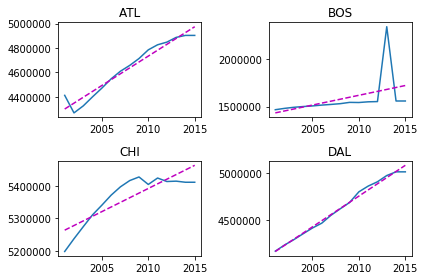

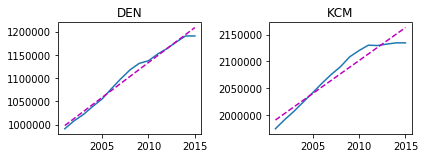

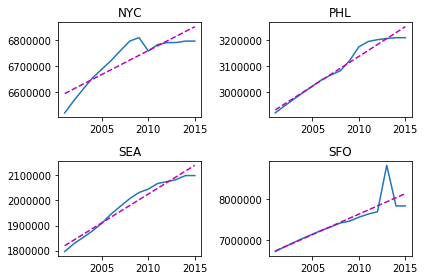

In [21]:
plt.subplot(2,2,1)
_=plt.plot(d1['Date_numeric'], d1['Population age 18-64'])
_=plt.title('ATL')
m,b=np.polyfit(d1['Date_numeric'], d1['Population age 18-64'],1)
_=plt.plot(d1['Date_numeric'], m*d1['Date_numeric']+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
_=plt.plot(d2['Date_numeric'], d2['Population age 18-64'])
_=plt.title('BOS')
m,b=np.polyfit(d2['Date_numeric'], d2['Population age 18-64'],1)
_=plt.plot(d2['Date_numeric'], m*d2['Date_numeric']+b, color='m', linestyle='dashed')

plt.subplot(2,2,3)
_=plt.plot(d3['Date_numeric'], d3['Population age 18-64'])
_=plt.title('CHI')
m,b=np.polyfit(d3['Date_numeric'], d3['Population age 18-64'],1)
_=plt.plot(d3['Date_numeric'], m*d3['Date_numeric']+b, color='m', linestyle='dashed')

plt.subplot(2,2,4)
_=plt.plot(d4['Date_numeric'], d4['Population age 18-64'])
_=plt.title('DAL')
m,b=np.polyfit(d4['Date_numeric'], d4['Population age 18-64'],1)
_=plt.plot(d4['Date_numeric'], m*d4['Date_numeric']+b, color='m', linestyle='dashed')

plt.tight_layout()
plt.show()


plt.subplot(2,2,1)
_=plt.plot(d5['Date_numeric'], d5['Population age 18-64'])
_=plt.title('DEN')
m,b=np.polyfit(d5['Date_numeric'], d5['Population age 18-64'],1)
_=plt.plot(d5['Date_numeric'], m*d5['Date_numeric']+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
_=plt.plot(d6['Date_numeric'], d6['Population age 18-64'])
_=plt.title('KCM')
m,b=np.polyfit(d6['Date_numeric'], d6['Population age 18-64'],1)
_=plt.plot(d6['Date_numeric'], m*d6['Date_numeric']+b, color='m', linestyle='dashed')

plt.tight_layout()
plt.show()

plt.subplot(2,2,1)
_=plt.plot(d7['Date_numeric'], d7['Population age 18-64'])
_=plt.title('NYC')
m,b=np.polyfit(d7['Date_numeric'], d7['Population age 18-64'],1)
_=plt.plot(d7['Date_numeric'], m*d7['Date_numeric']+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
_=plt.plot(d8['Date_numeric'], d8['Population age 18-64'])
_=plt.title('PHL')
m,b=np.polyfit(d8['Date_numeric'], d8['Population age 18-64'],1)
_=plt.plot(d8['Date_numeric'], m*d8['Date_numeric']+b, color='m', linestyle='dashed')

plt.subplot(2,2,3)
_=plt.plot(d9['Date_numeric'], d9['Population age 18-64'])
_=plt.title('SEA')
m,b=np.polyfit(d9['Date_numeric'], d9['Population age 18-64'],1)
_=plt.plot(d9['Date_numeric'], m*d9['Date_numeric']+b, color='m', linestyle='dashed')

plt.subplot(2,2,4)
_=plt.plot(d10['Date_numeric'], d10['Population age 18-64'])
_=plt.title('SFO')
m,b=np.polyfit(d10['Date_numeric'], d10['Population age 18-64'],1)
_=plt.plot(d10['Date_numeric'], m*d10['Date_numeric']+b, color='m', linestyle='dashed')

plt.tight_layout()
plt.show()

#Boston and San Fransisco show significant bumps in 2013.  May want to look into that.

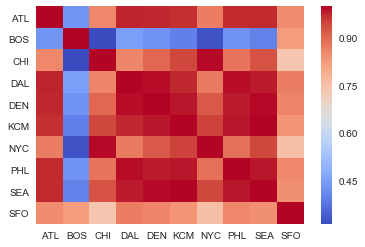

In [256]:
#plot correlations of regions

#create a dataframe with populations from all the regions
d_list_pop=[d1['Population age 18-64'], d2['Population age 18-64'], d3['Population age 18-64'],d4['Population age 18-64'],d5['Population age 18-64'],d6['Population age 18-64'],d7['Population age 18-64'],d8['Population age 18-64'],d9['Population age 18-64'],d10['Population age 18-64']]
corrs=pd.concat(d_list_pop, axis=1)
corrs.columns=['ATL', 'BOS', 'CHI', 'DAL', 'DEN', 'KCM', 'NYC', 'PHL', 'SEA', 'SFO']
corrs=corrs.corr()
#corrs.index=corrs.columns

sns.set()
sns.heatmap(corrs, cmap='coolwarm')




In [23]:
#Control Panel for changing the plots by state easier.

x_label='Year'
xcolumn='Date_numeric'


y_label='Adult Population'
ycolumn='Population age 18-64'
#ycolumn='Adult Favorable  Determination Rate'
#column='Percent of Adult Population Receiving SSA Adult Disability Benefits'



ATL Region


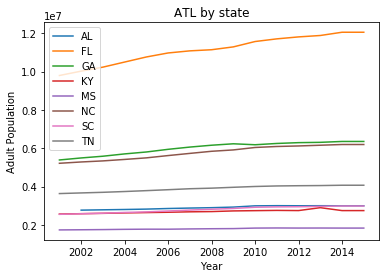

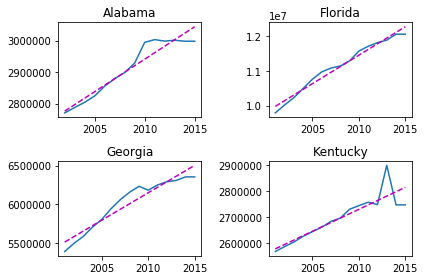

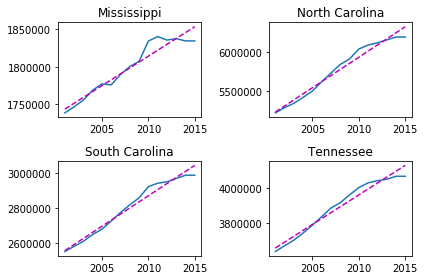

In [25]:
#ATL plots

print('ATL Region')

plt.plot(AL[xcolumn], AL[ycolumn])
plt.plot(FL[xcolumn], FL[ycolumn])
plt.plot(GA[xcolumn], GA[ycolumn])
plt.plot(KY[xcolumn], KY[ycolumn])
plt.plot(MS[xcolumn], MS[ycolumn])
plt.plot(NC[xcolumn], NC[ycolumn])
plt.plot(SC[xcolumn], SC[ycolumn])
plt.plot(TN[xcolumn], TN[ycolumn])
plt.title('ATL by state')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['AL','FL','GA','KY','MS','NC','SC','TN'])
plt.show()

plt.subplot(2,2,1)
plt.plot(AL[xcolumn], AL[ycolumn])
plt.title('Alabama')
m,b=np.polyfit(AL[xcolumn], AL[ycolumn],1)
plt.plot(AL[xcolumn], m*AL[xcolumn]+b, color='m', linestyle='dashed')


plt.subplot(2,2,2)
plt.plot(FL[xcolumn], FL[ycolumn])
plt.title('Florida')
m,b=np.polyfit(FL[xcolumn], FL[ycolumn],1)
plt.plot(FL[xcolumn], m*FL[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,3)
plt.plot(GA[xcolumn], GA[ycolumn])
plt.title('Georgia')
m,b=np.polyfit(GA[xcolumn], GA[ycolumn],1)
plt.plot(GA[xcolumn], m*GA[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,4)
plt.plot(KY[xcolumn], KY[ycolumn])
plt.title('Kentucky')
m,b=np.polyfit(KY[xcolumn], KY[ycolumn],1)
plt.plot(KY[xcolumn], m*KY[xcolumn]+b, color='m', linestyle='dashed')

plt.tight_layout()
plt.show()

plt.subplot(2,2,1)
plt.plot(MS[xcolumn], MS[ycolumn])
plt.title('Mississippi')
m,b=np.polyfit(MS[xcolumn], MS[ycolumn],1)
plt.plot(MS[xcolumn], m*MS[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(NC[xcolumn], NC[ycolumn])
plt.title('North Carolina')
m,b=np.polyfit(NC[xcolumn], NC[ycolumn],1)
plt.plot(NC[xcolumn], m*NC[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,3)
plt.plot(SC[xcolumn], SC[ycolumn])
plt.title('South Carolina') 
m,b=np.polyfit(SC[xcolumn], SC[ycolumn],1)
plt.plot(SC[xcolumn], m*SC[xcolumn]+b, color='m', linestyle='dashed')
    
plt.subplot(2,2,4)
plt.plot(TN[xcolumn], TN[ycolumn])
plt.title('Tennessee')
m,b=np.polyfit(TN[xcolumn], TN[ycolumn],1)
plt.plot(TN[xcolumn], m*TN[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()

BOS Region


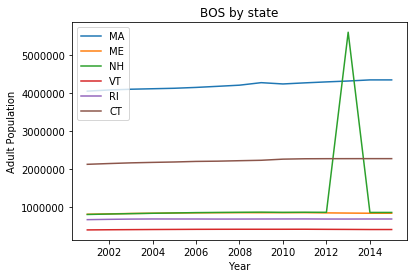

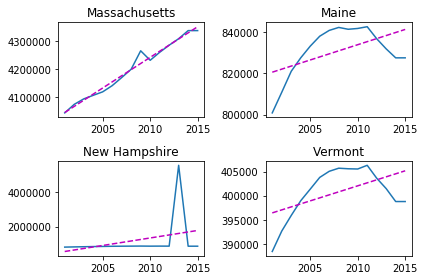

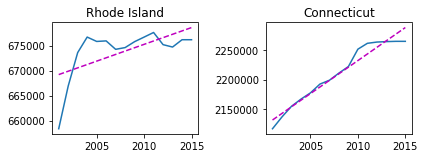

In [26]:
#BOS plots

print('BOS Region')

plt.plot(MA[xcolumn], MA[ycolumn])
plt.plot(ME[xcolumn], ME[ycolumn])
plt.plot(NH[xcolumn], NH[ycolumn])
plt.plot(VT[xcolumn], VT[ycolumn])
plt.plot(RI[xcolumn], RI[ycolumn])
plt.plot(CT[xcolumn], CT[ycolumn])
plt.title('BOS by state')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['MA','ME','NH','VT','RI','CT'])
plt.show()

plt.subplot(2,2,1)
plt.plot(MA[xcolumn], MA[ycolumn])
plt.title('Massachusetts')
m,b=np.polyfit(MA[xcolumn], MA[ycolumn],1)
plt.plot(MA[xcolumn], m*MA[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(ME[xcolumn], ME[ycolumn])
plt.title('Maine')
m,b=np.polyfit(ME[xcolumn], ME[ycolumn],1)
plt.plot(ME[xcolumn], m*ME[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,3)
plt.plot(NH[xcolumn], NH[ycolumn])
plt.title('New Hampshire')
m,b=np.polyfit(NH[xcolumn], NH[ycolumn],1)
plt.plot(NH[xcolumn], m*NH[xcolumn]+b, color='m', linestyle='dashed')
    
plt.subplot(2,2,4)
plt.plot(VT[xcolumn], VT[ycolumn])
plt.title('Vermont')
m,b=np.polyfit(VT[xcolumn], VT[ycolumn],1)
plt.plot(VT[xcolumn], m*VT[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()


plt.subplot(2,2,1)
plt.plot(RI[xcolumn], RI[ycolumn])
plt.title('Rhode Island')
m,b=np.polyfit(RI[xcolumn], RI[ycolumn],1)
plt.plot(RI[xcolumn], m*RI[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(CT[xcolumn], CT[ycolumn])
plt.title('Connecticut')
m,b=np.polyfit(CT[xcolumn], CT[ycolumn],1)
plt.plot(CT[xcolumn], m*CT[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()

Clearly New Hampshire has an outlier in 2013.  Supporting notes do not say if this is what 
we would assume to be an error or a one time event.  Without knowledge otherwise, we cannot
dismiss the anomaly.

CHI Region


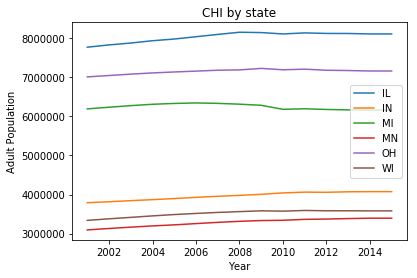

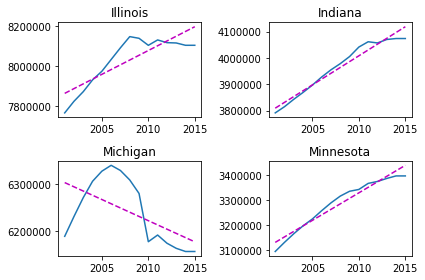

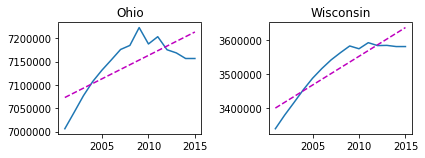

In [27]:
#CHI plots

print('CHI Region')

plt.plot(IL[xcolumn], IL[ycolumn])
plt.plot(IN[xcolumn], IN[ycolumn])
plt.plot(MI[xcolumn], MI[ycolumn])
plt.plot(MN[xcolumn], MN[ycolumn])
plt.plot(OH[xcolumn], OH[ycolumn])
plt.plot(WI[xcolumn], WI[ycolumn])
plt.title('CHI by state')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['IL','IN','MI','MN','OH','WI'])
plt.show()

plt.subplot(2,2,1)
plt.plot(IL[xcolumn], IL[ycolumn])
plt.title('Illinois')
m,b=np.polyfit(IL[xcolumn], IL[ycolumn],1)
plt.plot(IL[xcolumn], m*IL[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(IN[xcolumn], IN[ycolumn])
plt.title('Indiana')
m,b=np.polyfit(IN[xcolumn], IN[ycolumn],1)
plt.plot(IN[xcolumn], m*IN[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,3)
plt.plot(MI[xcolumn], MI[ycolumn])
plt.title('Michigan') 
m,b=np.polyfit(MI[xcolumn], MI[ycolumn],1)
plt.plot(MI[xcolumn], m*MI[xcolumn]+b, color='m', linestyle='dashed')
    
plt.subplot(2,2,4)
plt.plot(MN[xcolumn], MN[ycolumn])
plt.title('Minnesota')
m,b=np.polyfit(MN[xcolumn], MN[ycolumn],1)
plt.plot(MN[xcolumn], m*MN[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()


plt.subplot(2,2,1)
plt.plot(OH[xcolumn], OH[ycolumn])
plt.title('Ohio')
m,b=np.polyfit(OH[xcolumn], OH[ycolumn],1)
plt.plot(CT[xcolumn], m*OH[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(WI[xcolumn], WI[ycolumn])
plt.title('Wisconsin')
m,b=np.polyfit(WI[xcolumn], WI[ycolumn],1)
plt.plot(WI[xcolumn], m*WI[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()

DAL Region


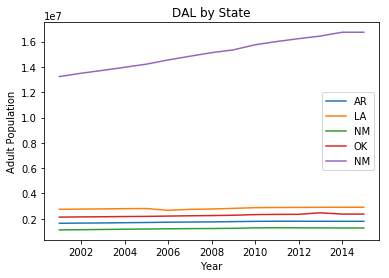

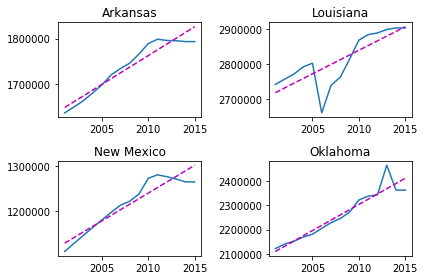

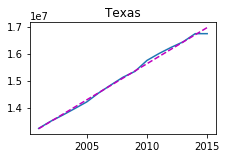

In [28]:
#DAL plots

print('DAL Region')

plt.plot(AR[xcolumn], AR[ycolumn])
plt.plot(LA[xcolumn], LA[ycolumn])
plt.plot(NM[xcolumn], NM[ycolumn])
plt.plot(OK[xcolumn], OK[ycolumn])
plt.plot(TX[xcolumn], TX[ycolumn])
plt.title('DAL by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['AR','LA','NM','OK','NM'])
plt.show()


plt.subplot(2,2,1)
plt.plot(AR[xcolumn], AR[ycolumn])
plt.title('Arkansas')
m,b=np.polyfit(AR[xcolumn], AR[ycolumn],1)
plt.plot(AR[xcolumn], m*AR[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(LA[xcolumn], LA[ycolumn])
plt.title('Louisiana')
m,b=np.polyfit(LA[xcolumn], LA[ycolumn],1)
plt.plot(LA[xcolumn], m*LA[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,3)
plt.plot(NM[xcolumn], NM[ycolumn])
plt.title('New Mexico')
m,b=np.polyfit(NM[xcolumn], NM[ycolumn],1)
plt.plot(NM[xcolumn], m*NM[xcolumn]+b, color='m', linestyle='dashed')
    
plt.subplot(2,2,4)
plt.plot(OK[xcolumn], OK[ycolumn])
plt.title('Oklahoma')
m,b=np.polyfit(OK[xcolumn], OK[ycolumn],1)
plt.plot(OK[xcolumn], m*OK[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()


plt.subplot(2,2,1)
plt.plot(TX[xcolumn], TX[ycolumn])
plt.title('Texas')
m,b=np.polyfit(TX[xcolumn], TX[ycolumn],1)
plt.plot(TX[xcolumn], m*TX[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()

DEN Region


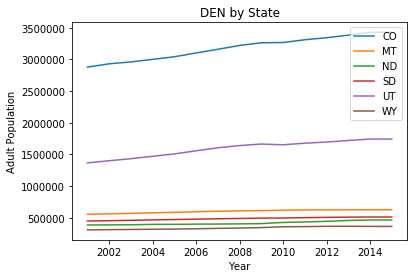

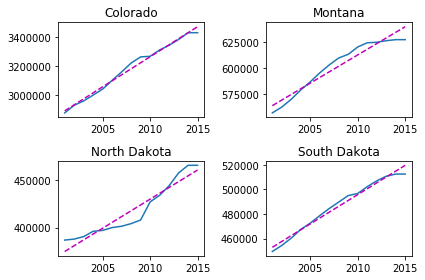

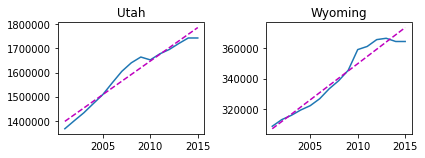

In [29]:
#DEN plots

print('DEN Region')

plt.plot(CO[xcolumn], CO[ycolumn])
plt.plot(MT[xcolumn], MT[ycolumn])
plt.plot(ND[xcolumn], ND[ycolumn])
plt.plot(SD[xcolumn], SD[ycolumn])
plt.plot(UT[xcolumn], UT[ycolumn])
plt.plot(WY[xcolumn], WY[ycolumn])
plt.title('DEN by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['CO','MT','ND','SD','UT','WY'])
plt.show()

plt.subplot(2,2,1)
plt.plot(CO[xcolumn], CO[ycolumn])
plt.title('Colorado')
m,b=np.polyfit(CO[xcolumn], CO[ycolumn],1)
plt.plot(CO[xcolumn], m*CO[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(MT[xcolumn], MT[ycolumn])
plt.title('Montana')
m,b=np.polyfit(MT[xcolumn], MT[ycolumn],1)
plt.plot(MT[xcolumn], m*MT[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,3)
plt.plot(ND[xcolumn], ND[ycolumn])
plt.title('North Dakota')  
m,b=np.polyfit(ND[xcolumn], ND[ycolumn],1)
plt.plot(ND[xcolumn], m*ND[xcolumn]+b, color='m', linestyle='dashed')
    
plt.subplot(2,2,4)
plt.plot(SD[xcolumn], SD[ycolumn])
plt.title('South Dakota')
m,b=np.polyfit(SD[xcolumn], SD[ycolumn],1)
plt.plot(SD[xcolumn], m*SD[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()


plt.subplot(2,2,1)
plt.plot(UT[xcolumn], UT[ycolumn])
plt.title('Utah')
m,b=np.polyfit(UT[xcolumn], UT[ycolumn],1)
plt.plot(UT[xcolumn], m*UT[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(WY[xcolumn], WY[ycolumn])
plt.title('Wyoming')
m,b=np.polyfit(WY[xcolumn], WY[ycolumn],1)
plt.plot(WY[xcolumn], m*WY[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()

KCM Region


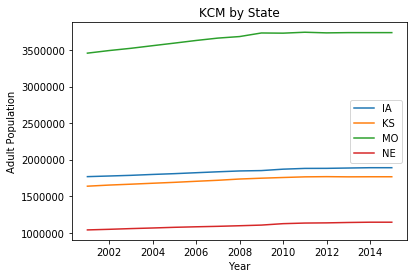

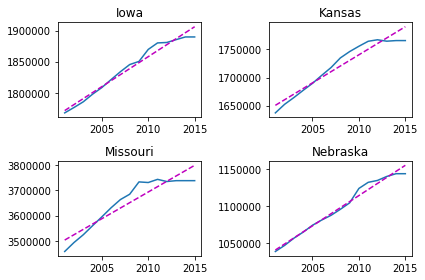

In [30]:
#KCM plots

print('KCM Region')

plt.plot(IA[xcolumn], IA[ycolumn])
plt.plot(KS[xcolumn], KS[ycolumn])
plt.plot(MO[xcolumn], MO[ycolumn])
plt.plot(NE[xcolumn], NE[ycolumn])
plt.title('KCM by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['IA','KS','MO','NE'])
plt.show()

plt.subplot(2,2,1)
plt.plot(IA[xcolumn], IA[ycolumn])
plt.title('Iowa')
m,b=np.polyfit(IA[xcolumn], IA[ycolumn],1)
plt.plot(IA[xcolumn], m*IA[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(KS[xcolumn], KS[ycolumn])
plt.title('Kansas')
m,b=np.polyfit(KS[xcolumn], KS[ycolumn],1)
plt.plot(KS[xcolumn], m*KS[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,3)
plt.plot(MO[xcolumn], MO[ycolumn])
plt.title('Missouri') 
m,b=np.polyfit(OK[xcolumn], MO[ycolumn],1)
plt.plot(MO[xcolumn], m*MO[xcolumn]+b, color='m', linestyle='dashed')
    
plt.subplot(2,2,4)
plt.plot(NE[xcolumn], NE[ycolumn])
plt.title('Nebraska')
m,b=np.polyfit(NE[xcolumn], NE[ycolumn],1)
plt.plot(NE[xcolumn], m*NE[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()



NYC Region


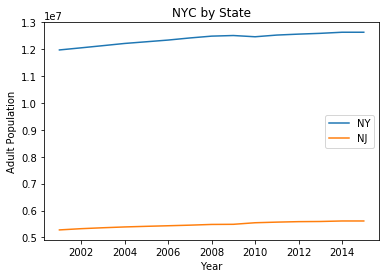

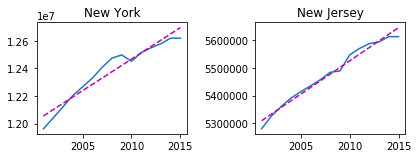

In [31]:
#NYC

print('NYC Region')

plt.plot(NY[xcolumn], NY[ycolumn])
plt.plot(NJ[xcolumn], NJ[ycolumn])
plt.title('NYC by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['NY','NJ'])
plt.show()

plt.subplot(2,2,1)
plt.plot(NY[xcolumn], NY[ycolumn])
plt.title('New York')
m,b=np.polyfit(NY[xcolumn], NY[ycolumn],1)
plt.plot(NY[xcolumn], m*NY[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(NJ[xcolumn], NJ[ycolumn])
plt.title('New Jersey')
m,b=np.polyfit(NJ[xcolumn], NJ[ycolumn],1)
plt.plot(NJ[xcolumn], m*NJ[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()

PHL Region


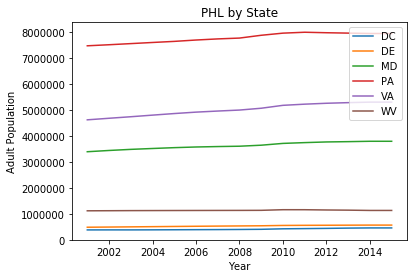

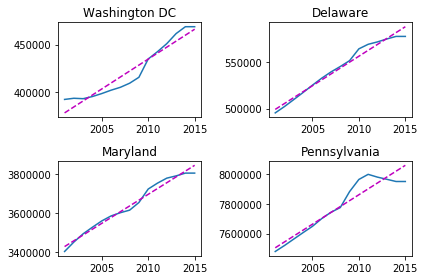

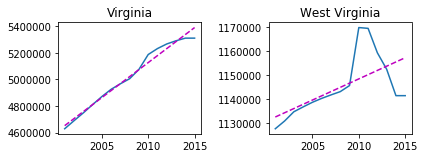

In [33]:
#PHL plots

print('PHL Region')

plt.plot(DC[xcolumn], DC[ycolumn])
plt.plot(DE[xcolumn], DE[ycolumn])
plt.plot(MD[xcolumn], MD[ycolumn])
plt.plot(PA[xcolumn], PA[ycolumn])
plt.plot(VA[xcolumn], VA[ycolumn])
plt.plot(WV[xcolumn], WV[ycolumn])
plt.title('PHL by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['DC','DE','MD','PA','VA','WV'])
plt.show()

plt.subplot(2,2,1)
plt.plot(DC[xcolumn], DC[ycolumn])
plt.title('Washington DC')
m,b=np.polyfit(DC[xcolumn], DC[ycolumn],1)
plt.plot(DC[xcolumn], m*DC[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(DE[xcolumn], DE[ycolumn])
plt.title('Delaware')
m,b=np.polyfit(DE[xcolumn], DE[ycolumn],1)
plt.plot(DE[xcolumn], m*DE[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,3)
plt.plot(MD[xcolumn], MD[ycolumn])
plt.title('Maryland') 
m,b=np.polyfit(MD[xcolumn], MD[ycolumn],1)
plt.plot(MD[xcolumn], m*MD[xcolumn]+b, color='m', linestyle='dashed')
    
plt.subplot(2,2,4)
plt.plot(PA[xcolumn], PA[ycolumn])
plt.title('Pennsylvania')
m,b=np.polyfit(PA[xcolumn], PA[ycolumn],1)
plt.plot(PA[xcolumn], m*PA[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()


plt.subplot(2,2,1)
plt.plot(VA[xcolumn], VA[ycolumn])
plt.title('Virginia')
m,b=np.polyfit(VA[xcolumn], VA[ycolumn],1)
plt.plot(VA[xcolumn], m*VA[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(WV[xcolumn], WV[ycolumn])
plt.title('West Virginia')
m,b=np.polyfit(WV[xcolumn], WV[ycolumn],1)
plt.plot(WV[xcolumn], m*WV[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()

SEA Region


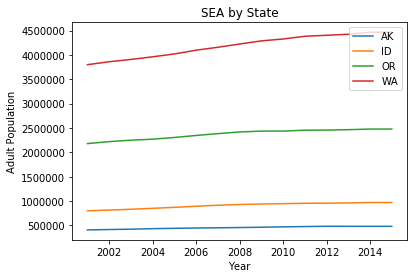

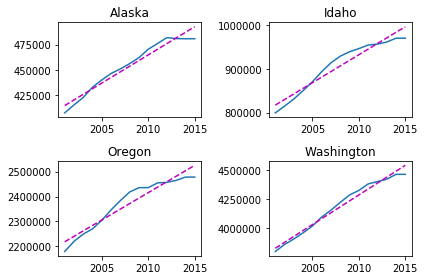

In [34]:
#SEA plots

print('SEA Region')

plt.plot(AK[xcolumn], AK[ycolumn])
plt.plot(ID[xcolumn], ID[ycolumn])
plt.plot(OR[xcolumn], OR[ycolumn])
plt.plot(WA[xcolumn], WA[ycolumn])
plt.title('SEA by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['AK','ID','OR','WA'])
plt.show()

plt.subplot(2,2,1)
plt.plot(AK[xcolumn], AK[ycolumn])
plt.title('Alaska')
m,b=np.polyfit(AK[xcolumn], AK[ycolumn],1)
plt.plot(AK[xcolumn], m*AK[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(ID[xcolumn], ID[ycolumn])
plt.title('Idaho')
m,b=np.polyfit(ID[xcolumn], ID[ycolumn],1)
plt.plot(ID[xcolumn], m*ID[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,3)
plt.plot(OR[xcolumn], OR[ycolumn])
plt.title('Oregon')
m,b=np.polyfit(OR[xcolumn], OR[ycolumn],1)
plt.plot(OR[xcolumn], m*OR[xcolumn]+b, color='m', linestyle='dashed')
    
plt.subplot(2,2,4)
plt.plot(WA[xcolumn], WA[ycolumn])
plt.title('Washington')
m,b=np.polyfit(WA[xcolumn], WA[ycolumn],1)
plt.plot(WA[xcolumn], m*WA[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()


SFO Region


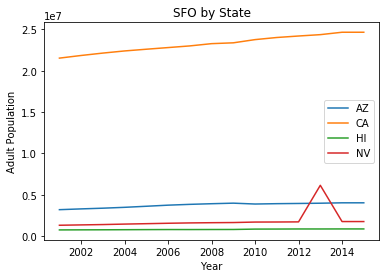

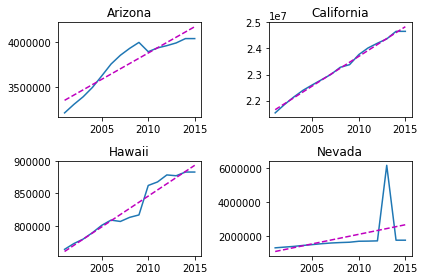

In [35]:
#SFO plots

print('SFO Region')

plt.plot(AZ[xcolumn], AZ[ycolumn])
plt.plot(CA[xcolumn], CA[ycolumn])
plt.plot(HI[xcolumn], HI[ycolumn])
plt.plot(NV[xcolumn], NV[ycolumn])
plt.title('SFO by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['AZ','CA','HI','NV'])
plt.show()

plt.subplot(2,2,1)
plt.plot(AZ[xcolumn], AZ[ycolumn])
plt.title('Arizona')
m,b=np.polyfit(AZ[xcolumn], AZ[ycolumn],1)
plt.plot(AZ[xcolumn], m*AZ[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(CA[xcolumn], CA[ycolumn])
plt.title('California')
m,b=np.polyfit(CA[xcolumn], CA[ycolumn],1)
plt.plot(CA[xcolumn], m*CA[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,3)
plt.plot(HI[xcolumn], HI[ycolumn])
plt.title('Hawaii')  
m,b=np.polyfit(HI[xcolumn], HI[ycolumn],1)
plt.plot(HI[xcolumn], m*HI[xcolumn]+b, color='m', linestyle='dashed')
    
plt.subplot(2,2,4)
plt.plot(NV[xcolumn], NV[ycolumn])
plt.title('Nevada')
m,b=np.polyfit(NV[xcolumn], NV[ycolumn],1)
plt.plot(NV[xcolumn], m*NV[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()


In [268]:
#Control Panel for changing the plots by state easier.

x_label='Year'
xcolumn='Date_numeric'


y_label='% of Adults on SSA Disability'
#ycolumn='Population age 18-64'
#ycolumn='Adult Favorable  Determination Rate'
ycolumn='Percent of Adult Population Receiving SSA Adult Disability Benefits'


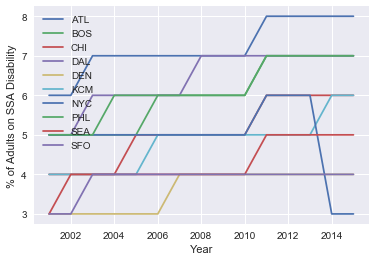

In [269]:
#groupby to plot population trends by region
SSA_agg = SSA_data.groupby(['Region Code','Date_numeric'])['Percent of Adult Population Receiving SSA Adult Disability Benefits'].mean()
SSA_agg_df=pd.DataFrame(SSA_agg).reset_index()
SSA_agg_df['Percent of Adult Population Receiving SSA Adult Disability Benefits']=SSA_agg_df['Percent of Adult Population Receiving SSA Adult Disability Benefits'].apply(np.int64)

#separate regions
d1=SSA_agg_df[SSA_agg_df['Region Code'] == 'ATL'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
d2=SSA_agg_df[SSA_agg_df['Region Code'] == 'BOS'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
d3=SSA_agg_df[SSA_agg_df['Region Code'] == 'CHI'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
d4=SSA_agg_df[SSA_agg_df['Region Code'] == 'DAL'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
d5=SSA_agg_df[SSA_agg_df['Region Code'] == 'DEN'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
d6=SSA_agg_df[SSA_agg_df['Region Code'] == 'KCM'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
d7=SSA_agg_df[SSA_agg_df['Region Code'] == 'NYC'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
d8=SSA_agg_df[SSA_agg_df['Region Code'] == 'PHL'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
d9=SSA_agg_df[SSA_agg_df['Region Code'] == 'SEA'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
d10=SSA_agg_df[SSA_agg_df['Region Code'] == 'SFO'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]

#reset indexes
d_list=[d1,d2,d3,d4,d5,d6,d7,d7,d8,d9,d10]
for data in d_list:
    data.reset_index(inplace=True)

#plot d1 through d10 in one chart to compare growth
_=plt.plot(d1['Date_numeric'], d1['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(d2['Date_numeric'], d2['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(d3['Date_numeric'], d3['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(d4['Date_numeric'], d4['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(d5['Date_numeric'], d5['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(d6['Date_numeric'], d6['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(d7['Date_numeric'], d7['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(d8['Date_numeric'], d8['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(d9['Date_numeric'], d9['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(d10['Date_numeric'], d10['Percent of Adult Population Receiving SSA Adult Disability Benefits'])

_=plt.xlabel('Year')
_=plt.ylabel(y_label)
_=plt.legend(['ATL', 'BOS', 'CHI', 'DAL', 'DEN', 'KCM', 'NYC', 'PHL', 'SEA', 'SFO'])
plt.show()

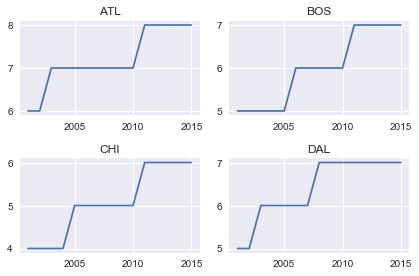

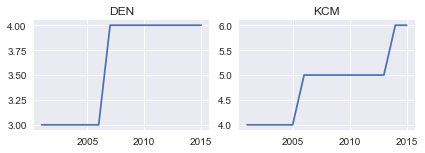

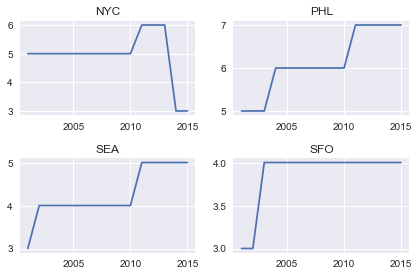

In [270]:
plt.subplot(2,2,1)
_=plt.plot(d1['Date_numeric'], d1['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('ATL')

plt.subplot(2,2,2)
_=plt.plot(d2['Date_numeric'], d2['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('BOS')

plt.subplot(2,2,3)
_=plt.plot(d3['Date_numeric'], d3['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('CHI')

plt.subplot(2,2,4)
_=plt.plot(d4['Date_numeric'], d4['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('DAL')

plt.tight_layout()
plt.show()

plt.subplot(2,2,1)
_=plt.plot(d5['Date_numeric'], d5['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('DEN')

plt.subplot(2,2,2)
_=plt.plot(d6['Date_numeric'], d6['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('KCM')

plt.tight_layout()
plt.show()

plt.subplot(2,2,1)
_=plt.plot(d7['Date_numeric'], d7['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('NYC')

plt.subplot(2,2,2)
_=plt.plot(d8['Date_numeric'], d8['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('PHL')

plt.subplot(2,2,3)
_=plt.plot(d9['Date_numeric'], d9['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('SEA')

plt.subplot(2,2,4)
_=plt.plot(d10['Date_numeric'], d10['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('SFO')

plt.tight_layout()
plt.show()

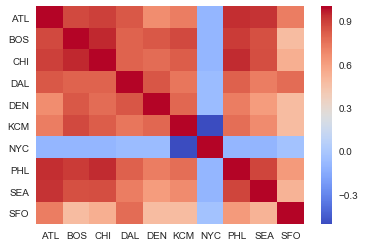

In [271]:
#plot correlations of regions

#create a dataframe with populations from all the regions
d_list_precent=[d1['Percent of Adult Population Receiving SSA Adult Disability Benefits'], d2['Percent of Adult Population Receiving SSA Adult Disability Benefits'], d3['Percent of Adult Population Receiving SSA Adult Disability Benefits'],d4['Percent of Adult Population Receiving SSA Adult Disability Benefits'],d5['Percent of Adult Population Receiving SSA Adult Disability Benefits'],d6['Percent of Adult Population Receiving SSA Adult Disability Benefits'],d7['Percent of Adult Population Receiving SSA Adult Disability Benefits'],d8['Percent of Adult Population Receiving SSA Adult Disability Benefits'],d9['Percent of Adult Population Receiving SSA Adult Disability Benefits'],d10['Percent of Adult Population Receiving SSA Adult Disability Benefits']]
corrs=pd.concat(d_list_precent, axis=1)
corrs.columns=['ATL', 'BOS', 'CHI', 'DAL', 'DEN', 'KCM', 'NYC', 'PHL', 'SEA', 'SFO']
corrs=corrs.corr()
#corrs.index=corrs.columns

sns.set()
sns.heatmap(corrs, cmap='coolwarm')

#shown by both the graphs above and the heatmap below, the NYC Region is a 
#clear outlier since it has had a shrinking number on dissability.

ATL Region


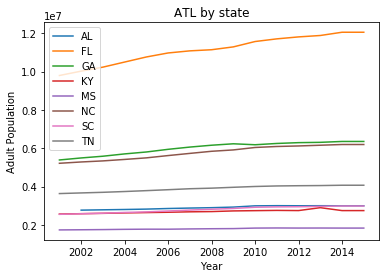

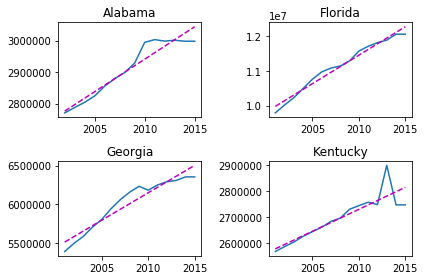

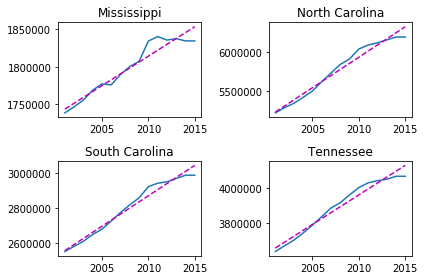

In [36]:
#ATL plots

print('ATL Region')

plt.plot(AL[xcolumn], AL[ycolumn])
plt.plot(FL[xcolumn], FL[ycolumn])
plt.plot(GA[xcolumn], GA[ycolumn])
plt.plot(KY[xcolumn], KY[ycolumn])
plt.plot(MS[xcolumn], MS[ycolumn])
plt.plot(NC[xcolumn], NC[ycolumn])
plt.plot(SC[xcolumn], SC[ycolumn])
plt.plot(TN[xcolumn], TN[ycolumn])
plt.title('ATL by state')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['AL','FL','GA','KY','MS','NC','SC','TN'])
plt.show()

plt.subplot(2,2,1)
plt.plot(AL[xcolumn], AL[ycolumn])
plt.title('Alabama')
m,b=np.polyfit(AL[xcolumn], AL[ycolumn],1)
plt.plot(AL[xcolumn], m*AL[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(FL[xcolumn], FL[ycolumn])
plt.title('Florida')
m,b=np.polyfit(FL[xcolumn], FL[ycolumn],1)
plt.plot(FL[xcolumn], m*FL[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,3)
plt.plot(GA[xcolumn], GA[ycolumn])
plt.title('Georgia')
m,b=np.polyfit(GA[xcolumn], GA[ycolumn],1)
plt.plot(GA[xcolumn], m*GA[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,4)
plt.plot(KY[xcolumn], KY[ycolumn])
plt.title('Kentucky')
m,b=np.polyfit(KY[xcolumn], KY[ycolumn],1)
plt.plot(KY[xcolumn], m*KY[xcolumn]+b, color='m', linestyle='dashed')

plt.tight_layout()
plt.show()

plt.subplot(2,2,1)
plt.plot(MS[xcolumn], MS[ycolumn])
plt.title('Mississippi')
m,b=np.polyfit(MS[xcolumn], MS[ycolumn],1)
plt.plot(MS[xcolumn], m*MS[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(NC[xcolumn], NC[ycolumn])
plt.title('North Carolina')
m,b=np.polyfit(NC[xcolumn], NC[ycolumn],1)
plt.plot(NC[xcolumn], m*NC[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,3)
plt.plot(SC[xcolumn], SC[ycolumn])
plt.title('South Carolina') 
m,b=np.polyfit(SC[xcolumn], SC[ycolumn],1)
plt.plot(SC[xcolumn], m*SC[xcolumn]+b, color='m', linestyle='dashed')
    
plt.subplot(2,2,4)
plt.plot(TN[xcolumn], TN[ycolumn])
plt.title('Tennessee')
m,b=np.polyfit(TN[xcolumn], TN[ycolumn],1)
plt.plot(TN[xcolumn], m*TN[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()

BOS Region


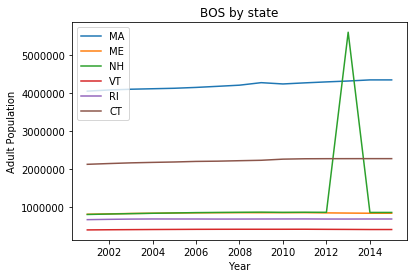

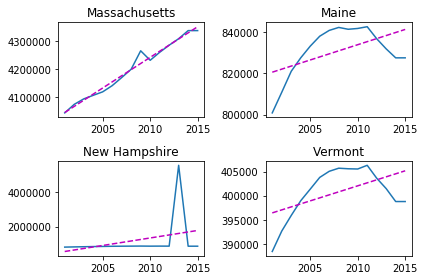

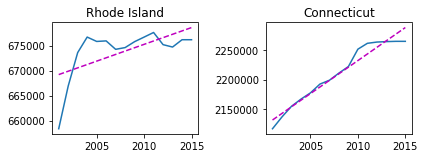

In [37]:
#BOS plots

print('BOS Region')

plt.plot(MA[xcolumn], MA[ycolumn])
plt.plot(ME[xcolumn], ME[ycolumn])
plt.plot(NH[xcolumn], NH[ycolumn])
plt.plot(VT[xcolumn], VT[ycolumn])
plt.plot(RI[xcolumn], RI[ycolumn])
plt.plot(CT[xcolumn], CT[ycolumn])
plt.title('BOS by state')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['MA','ME','NH','VT','RI','CT'])
plt.show()

plt.subplot(2,2,1)
plt.plot(MA[xcolumn], MA[ycolumn])
plt.title('Massachusetts')
m,b=np.polyfit(MA[xcolumn], MA[ycolumn],1)
plt.plot(MA[xcolumn], m*MA[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(ME[xcolumn], ME[ycolumn])
plt.title('Maine')
m,b=np.polyfit(ME[xcolumn], ME[ycolumn],1)
plt.plot(ME[xcolumn], m*ME[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,3)
plt.plot(NH[xcolumn], NH[ycolumn])
plt.title('New Hampshire')  
m,b=np.polyfit(NH[xcolumn], NH[ycolumn],1)
plt.plot(NH[xcolumn], m*NH[xcolumn]+b, color='m', linestyle='dashed')
    
plt.subplot(2,2,4)
plt.plot(VT[xcolumn], VT[ycolumn])
plt.title('Vermont')
m,b=np.polyfit(VT[xcolumn], VT[ycolumn],1)
plt.plot(VT[xcolumn], m*VT[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()


plt.subplot(2,2,1)
plt.plot(RI[xcolumn], RI[ycolumn])
plt.title('Rhode Island')
m,b=np.polyfit(RI[xcolumn], RI[ycolumn],1)
plt.plot(RI[xcolumn], m*RI[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(CT[xcolumn], CT[ycolumn])
plt.title('Connecticut')
m,b=np.polyfit(CT[xcolumn], CT[ycolumn],1)
plt.plot(CT[xcolumn], m*CT[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()


CHI Region


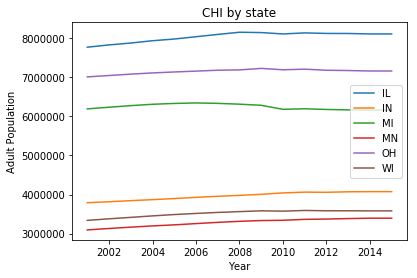

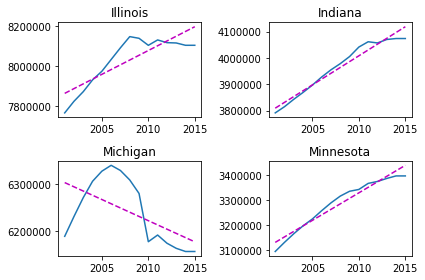

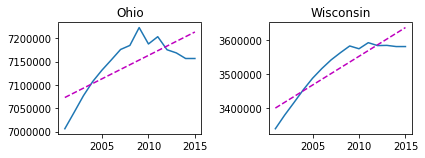

In [38]:
#CHI plots

print('CHI Region')

plt.plot(IL[xcolumn], IL[ycolumn])
plt.plot(IN[xcolumn], IN[ycolumn])
plt.plot(MI[xcolumn], MI[ycolumn])
plt.plot(MN[xcolumn], MN[ycolumn])
plt.plot(OH[xcolumn], OH[ycolumn])
plt.plot(WI[xcolumn], WI[ycolumn])
plt.title('CHI by state')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['IL','IN','MI','MN','OH','WI'])
plt.show()

plt.subplot(2,2,1)
plt.plot(IL[xcolumn], IL[ycolumn])
plt.title('Illinois')
m,b=np.polyfit(IL[xcolumn], IL[ycolumn],1)
plt.plot(IL[xcolumn], m*IL[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(IN[xcolumn], IN[ycolumn])
plt.title('Indiana')
m,b=np.polyfit(IN[xcolumn], IN[ycolumn],1)
plt.plot(IN[xcolumn], m*IN[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,3)
plt.plot(MI[xcolumn], MI[ycolumn])
plt.title('Michigan') 
m,b=np.polyfit(MI[xcolumn], MI[ycolumn],1)
plt.plot(MI[xcolumn], m*MI[xcolumn]+b, color='m', linestyle='dashed')
    
plt.subplot(2,2,4)
plt.plot(MN[xcolumn], MN[ycolumn])
plt.title('Minnesota')
m,b=np.polyfit(MN[xcolumn], MN[ycolumn],1)
plt.plot(MN[xcolumn], m*MN[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()


plt.subplot(2,2,1)
plt.plot(OH[xcolumn], OH[ycolumn])
plt.title('Ohio')
m,b=np.polyfit(OH[xcolumn], OH[ycolumn],1)
plt.plot(OH[xcolumn], m*OH[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(WI[xcolumn], WI[ycolumn])
plt.title('Wisconsin')
m,b=np.polyfit(WI[xcolumn], WI[ycolumn],1)
plt.plot(WI[xcolumn], m*WI[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()

DAL Region


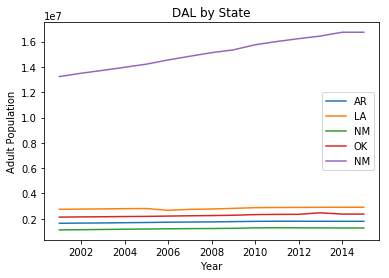

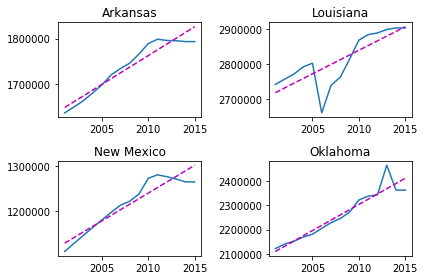

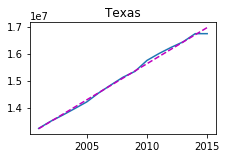

In [39]:
#DAL plots

print('DAL Region')

plt.plot(AR[xcolumn], AR[ycolumn])
plt.plot(LA[xcolumn], LA[ycolumn])
plt.plot(NM[xcolumn], NM[ycolumn])
plt.plot(OK[xcolumn], OK[ycolumn])
plt.plot(TX[xcolumn], TX[ycolumn])
plt.title('DAL by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['AR','LA','NM','OK','NM'])
plt.show()

plt.subplot(2,2,1)
plt.plot(AR[xcolumn], AR[ycolumn])
plt.title('Arkansas')
m,b=np.polyfit(AR[xcolumn], AR[ycolumn],1)
plt.plot(AR[xcolumn], m*AR[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(LA[xcolumn], LA[ycolumn])
plt.title('Louisiana')
m,b=np.polyfit(LA[xcolumn], LA[ycolumn],1)
plt.plot(LA[xcolumn], m*LA[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,3)
plt.plot(NM[xcolumn], NM[ycolumn])
plt.title('New Mexico')  
m,b=np.polyfit(NM[xcolumn], NM[ycolumn],1)
plt.plot(NM[xcolumn], m*NM[xcolumn]+b, color='m', linestyle='dashed')
    
plt.subplot(2,2,4)
plt.plot(OK[xcolumn], OK[ycolumn])
plt.title('Oklahoma')
m,b=np.polyfit(OK[xcolumn], OK[ycolumn],1)
plt.plot(OK[xcolumn], m*OK[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()


plt.subplot(2,2,1)
plt.plot(TX[xcolumn], TX[ycolumn])
plt.title('Texas')
m,b=np.polyfit(TX[xcolumn], TX[ycolumn],1)
plt.plot(TX[xcolumn], m*TX[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()

DEN Region


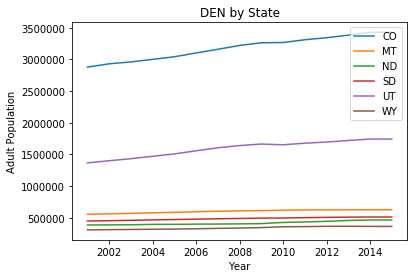

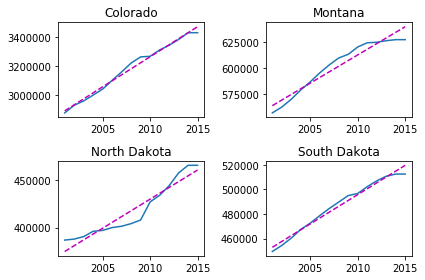

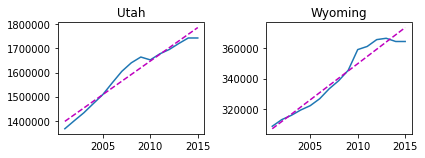

In [40]:
#DEN plots

print('DEN Region')

plt.plot(CO[xcolumn], CO[ycolumn])
plt.plot(MT[xcolumn], MT[ycolumn])
plt.plot(ND[xcolumn], ND[ycolumn])
plt.plot(SD[xcolumn], SD[ycolumn])
plt.plot(UT[xcolumn], UT[ycolumn])
plt.plot(WY[xcolumn], WY[ycolumn])
plt.title('DEN by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['CO','MT','ND','SD','UT','WY'])
plt.show()

plt.subplot(2,2,1)
plt.plot(CO[xcolumn], CO[ycolumn])
plt.title('Colorado')
m,b=np.polyfit(CO[xcolumn], CO[ycolumn],1)
plt.plot(CO[xcolumn], m*CO[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(MT[xcolumn], MT[ycolumn])
plt.title('Montana')
m,b=np.polyfit(MT[xcolumn], MT[ycolumn],1)
plt.plot(MT[xcolumn], m*MT[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,3)
plt.plot(ND[xcolumn], ND[ycolumn])
plt.title('North Dakota') 
m,b=np.polyfit(ND[xcolumn], ND[ycolumn],1)
plt.plot(ND[xcolumn], m*ND[xcolumn]+b, color='m', linestyle='dashed')
    
plt.subplot(2,2,4)
plt.plot(SD[xcolumn], SD[ycolumn])
plt.title('South Dakota')
m,b=np.polyfit(SD[xcolumn], SD[ycolumn],1)
plt.plot(SD[xcolumn], m*SD[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()


plt.subplot(2,2,1)
plt.plot(UT[xcolumn], UT[ycolumn])
plt.title('Utah')
m,b=np.polyfit(UT[xcolumn], UT[ycolumn],1)
plt.plot(UT[xcolumn], m*UT[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(WY[xcolumn], WY[ycolumn])
plt.title('Wyoming')
m,b=np.polyfit(WY[xcolumn], WY[ycolumn],1)
plt.plot(WY[xcolumn], m*WY[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()

KCM Region


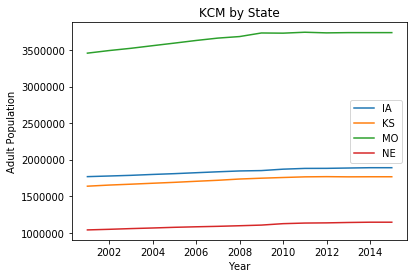

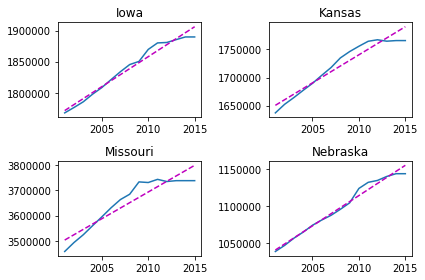

In [41]:
#KCM plots

print('KCM Region')

plt.plot(IA[xcolumn], IA[ycolumn])
plt.plot(KS[xcolumn], KS[ycolumn])
plt.plot(MO[xcolumn], MO[ycolumn])
plt.plot(NE[xcolumn], NE[ycolumn])
plt.title('KCM by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['IA','KS','MO','NE'])
plt.show()

plt.subplot(2,2,1)
plt.plot(IA[xcolumn], IA[ycolumn])
plt.title('Iowa')
m,b=np.polyfit(IA[xcolumn], IA[ycolumn],1)
plt.plot(IA[xcolumn], m*IA[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(KS[xcolumn], KS[ycolumn])
plt.title('Kansas')
m,b=np.polyfit(KS[xcolumn], KS[ycolumn],1)
plt.plot(KS[xcolumn], m*KS[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,3)
plt.plot(MO[xcolumn], MO[ycolumn])
plt.title('Missouri') 
m,b=np.polyfit(MO[xcolumn], MO[ycolumn],1)
plt.plot(MO[xcolumn], m*MO[xcolumn]+b, color='m', linestyle='dashed')
    
plt.subplot(2,2,4)
plt.plot(NE[xcolumn], NE[ycolumn])
plt.title('Nebraska')
m,b=np.polyfit(NE[xcolumn], NE[ycolumn],1)
plt.plot(NE[xcolumn], m*NE[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()



NYC Region


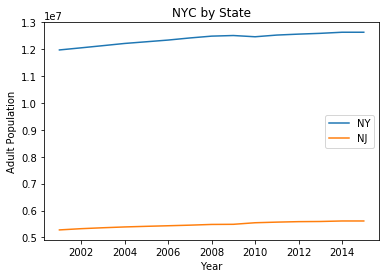

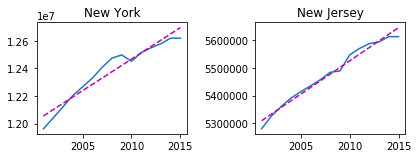

In [42]:
#NYC

print('NYC Region')

plt.plot(NY[xcolumn], NY[ycolumn])
plt.plot(NJ[xcolumn], NJ[ycolumn])
plt.title('NYC by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['NY','NJ'])
plt.show()

plt.subplot(2,2,1)
plt.plot(NY[xcolumn], NY[ycolumn])
plt.title('New York')
m,b=np.polyfit(NY[xcolumn], NY[ycolumn],1)
plt.plot(NY[xcolumn], m*NY[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(NJ[xcolumn], NJ[ycolumn])
plt.title('New Jersey')
m,b=np.polyfit(NJ[xcolumn], NJ[ycolumn],1)
plt.plot(NJ[xcolumn], m*NJ[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()

PHL Region


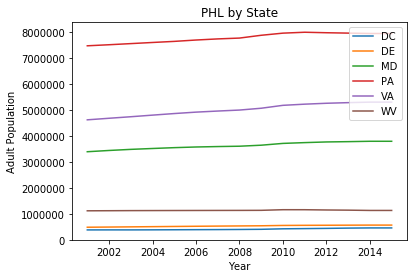

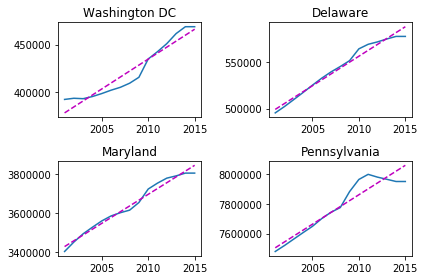

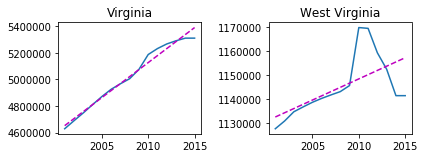

In [43]:
#PHL plots

print('PHL Region')

plt.plot(DC[xcolumn], DC[ycolumn])
plt.plot(DE[xcolumn], DE[ycolumn])
plt.plot(MD[xcolumn], MD[ycolumn])
plt.plot(PA[xcolumn], PA[ycolumn])
plt.plot(VA[xcolumn], VA[ycolumn])
plt.plot(WV[xcolumn], WV[ycolumn])
plt.title('PHL by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['DC','DE','MD','PA','VA','WV'])
plt.show()

plt.subplot(2,2,1)
plt.plot(DC[xcolumn], DC[ycolumn])
plt.title('Washington DC')
m,b=np.polyfit(DC[xcolumn], DC[ycolumn],1)
plt.plot(DC[xcolumn], m*DC[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(DE[xcolumn], DE[ycolumn])
plt.title('Delaware')
m,b=np.polyfit(DE[xcolumn], DE[ycolumn],1)
plt.plot(DE[xcolumn], m*DE[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,3)
plt.plot(MD[xcolumn], MD[ycolumn])
plt.title('Maryland') 
m,b=np.polyfit(MD[xcolumn], MD[ycolumn],1)
plt.plot(MD[xcolumn], m*MD[xcolumn]+b, color='m', linestyle='dashed')
    
plt.subplot(2,2,4)
plt.plot(PA[xcolumn], PA[ycolumn])
plt.title('Pennsylvania')
m,b=np.polyfit(PA[xcolumn], PA[ycolumn],1)
plt.plot(PA[xcolumn], m*PA[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()


plt.subplot(2,2,1)
plt.plot(VA[xcolumn], VA[ycolumn])
plt.title('Virginia')
m,b=np.polyfit(VA[xcolumn], VA[ycolumn],1)
plt.plot(VA[xcolumn], m*VA[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(WV[xcolumn], WV[ycolumn])
plt.title('West Virginia')
m,b=np.polyfit(WV[xcolumn], WV[ycolumn],1)
plt.plot(WV[xcolumn], m*WV[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()

SEA Region


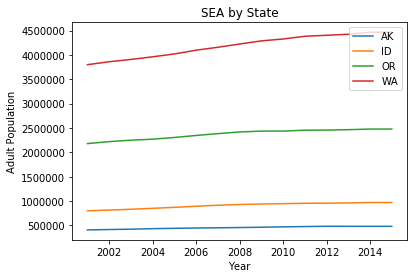

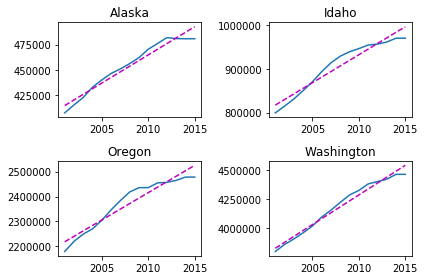

In [44]:
#SEA plots

print('SEA Region')

plt.plot(AK[xcolumn], AK[ycolumn])
plt.plot(ID[xcolumn], ID[ycolumn])
plt.plot(OR[xcolumn], OR[ycolumn])
plt.plot(WA[xcolumn], WA[ycolumn])
plt.title('SEA by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['AK','ID','OR','WA'])
plt.show()

plt.subplot(2,2,1)
plt.plot(AK[xcolumn], AK[ycolumn])
plt.title('Alaska')
m,b=np.polyfit(AK[xcolumn], AK[ycolumn],1)
plt.plot(AK[xcolumn], m*AK[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(ID[xcolumn], ID[ycolumn])
plt.title('Idaho')
m,b=np.polyfit(ID[xcolumn], ID[ycolumn],1)
plt.plot(ID[xcolumn], m*ID[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,3)
plt.plot(OR[xcolumn], OR[ycolumn])
plt.title('Oregon')  
m,b=np.polyfit(OR[xcolumn], OR[ycolumn],1)
plt.plot(OR[xcolumn], m*OR[xcolumn]+b, color='m', linestyle='dashed')
    
plt.subplot(2,2,4)
plt.plot(WA[xcolumn], WA[ycolumn])
plt.title('Washington')
m,b=np.polyfit(WA[xcolumn], WA[ycolumn],1)
plt.plot(WA[xcolumn], m*WA[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()


SFO Region


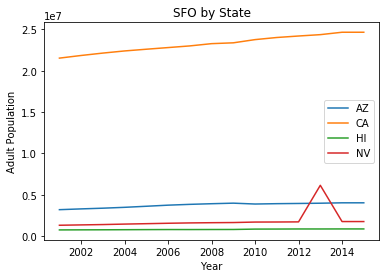

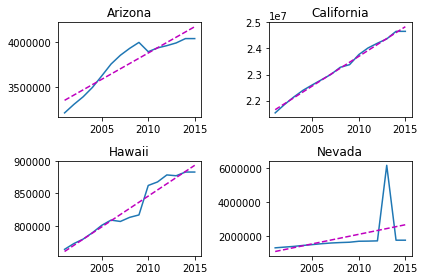

In [45]:
#SFO plots

print('SFO Region')

plt.plot(AZ[xcolumn], AZ[ycolumn])
plt.plot(CA[xcolumn], CA[ycolumn])
plt.plot(HI[xcolumn], HI[ycolumn])
plt.plot(NV[xcolumn], NV[ycolumn])
plt.title('SFO by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['AZ','CA','HI','NV'])
plt.show()

plt.subplot(2,2,1)
plt.plot(AZ[xcolumn], AZ[ycolumn])
plt.title('Arizona')
m,b=np.polyfit(AZ[xcolumn], AZ[ycolumn],1)
plt.plot(AZ[xcolumn], m*AZ[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,2)
plt.plot(CA[xcolumn], CA[ycolumn])
plt.title('California')
m,b=np.polyfit(CA[xcolumn], CA[ycolumn],1)
plt.plot(CA[xcolumn], m*CA[xcolumn]+b, color='m', linestyle='dashed')

plt.subplot(2,2,3)
plt.plot(HI[xcolumn], HI[ycolumn])
plt.title('Hawaii')  
m,b=np.polyfit(HI[xcolumn], HI[ycolumn],1)
plt.plot(HI[xcolumn], m*HI[xcolumn]+b, color='m', linestyle='dashed')
    
plt.subplot(2,2,4)
plt.plot(NV[xcolumn], NV[ycolumn])
plt.title('Nevada')
m,b=np.polyfit(NV[xcolumn], NV[ycolumn],1)
plt.plot(NV[xcolumn], m*NV[xcolumn]+b, color='m', linestyle='dashed')
    
plt.tight_layout()
plt.show()
